In [1]:
import pandas as pd

folder   = 'f:/files/python/jupyter/trial3-ai/'
diabetes = pd.read_csv(folder + 'diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,Group
0,6,148,72,35,0,33.6,0.627,50,1,A
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,C
3,1,89,66,23,94,28.1,0.167,21,0,B
4,0,137,40,35,168,43.1,2.288,33,1,A


In [2]:
diabetes.columns
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,A
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,B
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,C
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,A


In [3]:
import tensorflow as tf

num_preg          = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc       = tf.feature_column.numeric_column('Glucose')
dias_press        = tf.feature_column.numeric_column('BloodPressure')
skin              = tf.feature_column.numeric_column('SkinThickness')
insulin           = tf.feature_column.numeric_column('Insulin')
bmi               = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigree')
age               = tf.feature_column.numeric_column('Age')

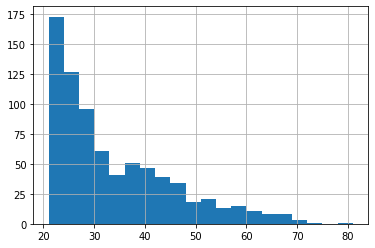

In [4]:
#categorycal features
assigned_group    = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

#converting continous to categorical
import matplotlib.pyplot as plt
%matplotlib inline
diabetes['Age'].hist(bins=20)

In [5]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 70, 80])

#combining all the features
feat_cols = [num_preg, plasma_gluc, dias_press, skin, insulin, bmi, diabetes_pedigree, assigned_group, age_buckets]

#splitting the data
x_data = diabetes.drop('Outcome', axis = 1)
labels = diabetes['Outcome']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.33, random_state = 101)


In [6]:
#applying input function
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, y = y_train, batch_size = 10, num_epochs = 500, shuffle = True)

#creating the model
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2, model_dir = folder)
model.train(input_fn = input_func, steps = 500)

W1105 16:41:52.701540  5260 deprecation.py:323] From C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W1105 16:41:52.857528  5260 deprecation.py:323] From C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W1105 16:41:52.863528  5260 deprecation.py:323] From C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\tensorflow_estimator\python\estima

In [7]:
#prediction
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, batch_size = 10, num_epochs = 1, shuffle = False)
predictions     = model.predict(pred_input_func)
list(predictions)

[{'logits': array([0.30610418], dtype=float32),
  'logistic': array([0.57593405], dtype=float32),
  'probabilities': array([0.42406595, 0.57593405], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.79625106], dtype=float32),
  'logistic': array([0.68917197], dtype=float32),
  'probabilities': array([0.31082803, 0.68917197], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.60211676], dtype=float32),
  'logistic': array([0.35385957], dtype=float32),
  'probabilities': array([0.64614046, 0.35385957], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)

In [8]:
#evaluating the model
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = x_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)
results         = model.evaluate(eval_input_func)
results

W1105 16:42:46.108716  5260 deprecation.py:323] From C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\tensorflow\python\ops\metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W1105 16:42:47.104708  5260 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W1105 16:42:47.166660  5260 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.70472443,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7806112,
 'auc_precision_recall': 0.63145643,
 'average_loss': 0.53272295,
 'label/mean': 0.34251967,
 'loss': 5.2042933,
 'precision': 0.5769231,
 'prediction/mean': 0.37508503,
 'recall': 0.51724136,
 'global_step': 1000}